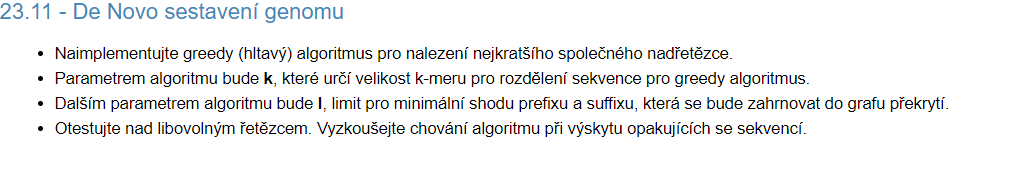

In [222]:
import itertools
import networkx as nx
import numpy as np

import nešel právě kvůli toho, že to šahá to špatného environmentu? jak se s tím poprat? 

In [223]:
sequence = 'GTACGTACGAT'
k = 6

In [224]:
def create_k_mers(sequence, k):
    return [sequence[i:i+k] for i in range(len(sequence) - k + 1)]

In [225]:
mers = create_k_mers(sequence, k)

In [300]:
def get_overlap(f, t):    
    size = np.min([len(f), len(t)])
    counter = 0
    
    numbers = list(range(size))
    numbers.reverse()
    
    for i in numbers:
        index = i + 1
        t_sub_seq = t[0:index]
        f_sub_seq = f[len(f)-1-i:] 
        
        
        if t_sub_seq == f_sub_seq:
            counter = index
            break

    return counter

In [301]:
import random

In [302]:
def find_max_overlap(G):
    data = G.edges(data=True)
    sorted_edges = list(sorted(data, key=lambda x: x[2]['weight'], reverse=True))
    max_edge = sorted_edges[0][2]['weight']
    max_edges = list(filter(lambda x: x[2]['weight'] == max_edge, data))
    picked_edge = random.choice(max_edges)
    return picked_edge

In [372]:
def build_graph(mers, limit):
    G = nx.DiGraph()
    edges = list(itertools.permutations(mers, 2))
    nodes = mers
    G.add_nodes_from(nodes)
    
    for edge in edges:
        a, b = edge
        overlap = get_overlap(a, b)        
        if overlap > limit:    
            G.add_edge(a, b, weight=overlap)
                
    return G

In [373]:
build_graph(mers, L)

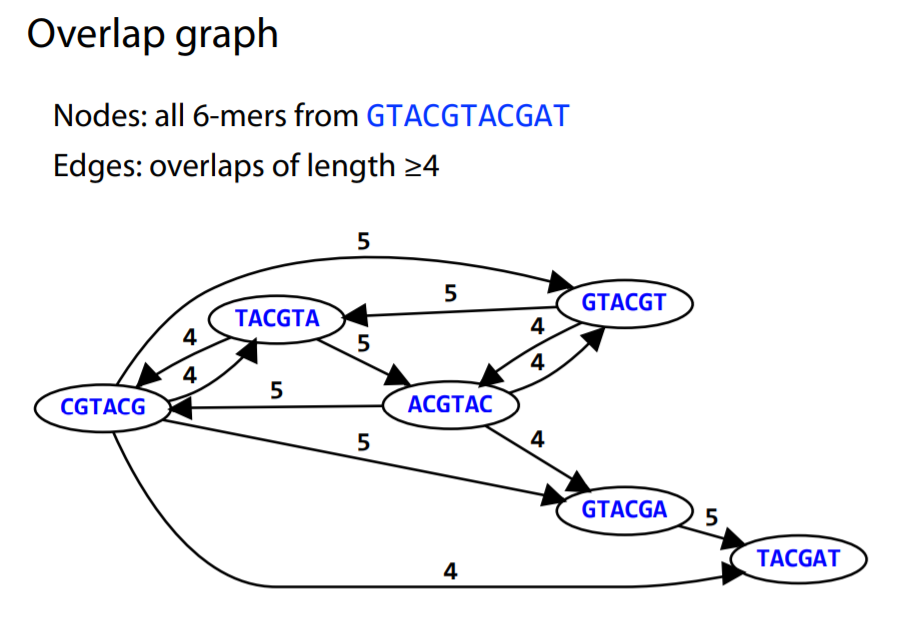

# Greedy algortimus implementace

## Konfigurace

In [382]:
L = 1
K = 6

In [383]:
def merge_nodes(a, b, overlap):
    new_value = a + b[overlap:]
    return [new_value]

In [414]:
def remove(l, value):
    for index, v in enumerate(l):
        if value == v:
            return l[0:index] + l[index+1:]        
    return l

In [424]:
def greedy(sequence, k=K, l=L):
    mers = create_k_mers(sequence, k)
    G = build_graph(mers, L)
    
    while len(G.nodes) > 1:
        max_edge = find_max_overlap(G)
        
        print(max_edge)
        
        node_1, node_2, attributes = max_edge 
        
        old_nodes = list(G.nodes())
        
        old_nodes = remove(old_nodes, node_1)
        old_nodes = remove(old_nodes, node_2)

        
        new_nodes = old_nodes + merge_nodes(node_1, node_2, attributes['weight'])
        
        #print(old_nodes, new_nodes)
        
        G = build_graph(new_nodes, L)
        
    superstring = G.nodes()
    return list(superstring)

In [425]:
greedy(sequence)

('TACGTA', 'ACGTAC', {'weight': 5})
('GTACGA', 'TACGAT', {'weight': 5})
('GTACGT', 'TACGTAC', {'weight': 5})
('CGTACG', 'GTACGTAC', {'weight': 5})
('CGTACGTAC', 'GTACGAT', {'weight': 4})


['CGTACGTACGAT']

### Opakující se sekvence

In [435]:
repeat_sequence = 'ABBAABBAABBAABAABAAAB'

In [436]:
len(greedy(repeat_sequence)[0])

('BAABBA', 'BAABBA', {'weight': 6})
('ABBAAB', 'BBAABA', {'weight': 5})
('AABAAA', 'ABAAAB', {'weight': 5})
('AABBAA', 'ABBAABA', {'weight': 5})
('ABAABA', 'BAABAA', {'weight': 5})
('AABAAB', 'ABAABAA', {'weight': 5})
('BBAABB', 'BAABBA', {'weight': 5})
('AABAABAA', 'AABAAAB', {'weight': 5})
('BBAABBA', 'AABBAABA', {'weight': 5})
('BBAABBAABA', 'AABAABAAAB', {'weight': 4})


16

In [437]:
len(greedy(repeat_sequence)[0])

('ABBAAB', 'ABBAAB', {'weight': 6})
('BBAABA', 'BAABAA', {'weight': 5})
('BAABBA', 'AABBAA', {'weight': 5})
('BBAABAA', 'AABAAB', {'weight': 5})
('AABAAA', 'ABAAAB', {'weight': 5})
('ABBAAB', 'BBAABB', {'weight': 5})
('ABBAABB', 'BAABBAA', {'weight': 5})
('BBAABAAB', 'ABAABA', {'weight': 5})
('BBAABAABA', 'AABAAAB', {'weight': 4})
('ABBAABBAA', 'BBAABAABAAAB', {'weight': 4})


17